#Project Description:

The project aims to predict the **Remaining Useful Time** (RUL) of a commerical aircraft using Commercial Modular Aero-Propulsion System Simulation (**CMAPSS**) dataset, the dataset is a public dataset from the official website of NASA's open data portal.

https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data

All the data sets used in this project are turbofan engine
degradation simulation datasets, generated by using C-MAPSS that
can be utilized to simulate the realistic work conditions of the
commercial turbofan engine provided by the Prognostics
CoE at NASA Ames.

The following notebook can be divided into 4 Main Sections
1. Data Gathering
2. Data Preprocessing
3. Feature Engineering
4. Modle Evaluation




#Data Gathering

In [2]:
import zipfile
import os
#load the zip file path directory
zip_file = '/content/CMAPSSData.zip'
#Provide Location for the unzipped folders to save
directory_path = '/content/CMAPSSData'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_path)
#Extracted files are listed
os.listdir(directory_path)



['train_FD004.txt',
 'RUL_FD002.txt',
 'test_FD002.txt',
 'test_FD001.txt',
 'RUL_FD004.txt',
 'readme.txt',
 'test_FD004.txt',
 'RUL_FD001.txt',
 'train_FD002.txt',
 'RUL_FD003.txt',
 'Damage Propagation Modeling.pdf',
 'train_FD003.txt',
 'train_FD001.txt',
 'test_FD003.txt']

To know more about the dataset, the file "readme.txt" can be used

In [ ]:
!cat CMAPSSData/readme.txt

Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trjectories: 260
Test trajectories: 259
Conditions: SIX 
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trjectories: 248
Test trajectories: 249
Conditions: SIX 
Fault Modes: TWO (HPC Degradation, Fan Degradation)



Experimental Scenario

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine � i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. Th

For this project we will only use 'FD_001' dataset, both train and test dataset.
The train data set here contains 100 engine units data, with all the engines being run to failure. So, the target variable which RUL is extracted from the cycles column

In [3]:
import pandas as pd
df_train = pd.read_csv('/content/CMAPSSData/train_FD001.txt', sep=' ', header=None)
df_test = pd.read_csv('/content/CMAPSSData/test_FD001.txt', sep=' ', header=None)
#To preview the raw dataset
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


Since the raw dataset contains no name for the features, we will assign the column names for better readability
Columns will be named as following:

1. Unit Id
2. Time in cycles
3. Operation setting 1
4. Operation setting 2
5. Operation setting 3
6. Sensor 1
7. Senor 2
8. Sensor ..

  .

  .
22. Sensor 21

In [4]:
column_names = ['Unit_ID', 'time_in_cycles'] +['Operational_setting_'+str(i) for i in range(1,4)] + ['Sensor_measurement_'+str(i) for i in range(1,24)]
df_train.columns = column_names
df_test.columns = column_names

#Preview the new dataframe
df_train.head(5)

,Unit_ID,time_in_cycles,Operational_setting_1,Operational_setting_2,Operational_setting_3,Sensor_measurement_1,Sensor_measurement_2,Sensor_measurement_3,Sensor_measurement_4,Sensor_measurement_5,...,Sensor_measurement_14,Sensor_measurement_15,Sensor_measurement_16,Sensor_measurement_17,Sensor_measurement_18,Sensor_measurement_19,Sensor_measurement_20,Sensor_measurement_21,Sensor_measurement_22,Sensor_measurement_23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


#Data Pre-Processing

In this stage we will clean the data and make it ready for our modelling

Since we are predicting **RUL**, we first need to create the **RUL** column.

RUL = time_in_cycles_max − time_in_cycles

In [5]:
# Group by engine and find the maximum cycle for each engine
max_cycle = df_train.groupby('Unit_ID')['time_in_cycles'].max()
df_train = df_train.merge(max_cycle, on='Unit_ID', suffixes=('', '_max'))
df_train['RUL'] = df_train['time_in_cycles_max'] - df_train['time_in_cycles']
df_train.shape
#showing all column names
df_train.columns

Index(['Unit_ID', 'time_in_cycles', 'Operational_setting_1',
       'Operational_setting_2', 'Operational_setting_3',
       'Sensor_measurement_1', 'Sensor_measurement_2', 'Sensor_measurement_3',
       'Sensor_measurement_4', 'Sensor_measurement_5', 'Sensor_measurement_6',
       'Sensor_measurement_7', 'Sensor_measurement_8', 'Sensor_measurement_9',
       'Sensor_measurement_10', 'Sensor_measurement_11',
       'Sensor_measurement_12', 'Sensor_measurement_13',
       'Sensor_measurement_14', 'Sensor_measurement_15',
       'Sensor_measurement_16', 'Sensor_measurement_17',
       'Sensor_measurement_18', 'Sensor_measurement_19',
       'Sensor_measurement_20', 'Sensor_measurement_21',
       'Sensor_measurement_22', 'Sensor_measurement_23', 'time_in_cycles_max',
       'RUL'],
      dtype='object')

In [6]:
#dropping the last column 'time_in_cycles_max' as it is a redudant column
df_train.drop('time_in_cycles_max', axis=1, inplace=True)
df_train.head()

,Unit_ID,time_in_cycles,Operational_setting_1,Operational_setting_2,Operational_setting_3,Sensor_measurement_1,Sensor_measurement_2,Sensor_measurement_3,Sensor_measurement_4,Sensor_measurement_5,...,Sensor_measurement_15,Sensor_measurement_16,Sensor_measurement_17,Sensor_measurement_18,Sensor_measurement_19,Sensor_measurement_20,Sensor_measurement_21,Sensor_measurement_22,Sensor_measurement_23,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN,187


In [6]:
# Dataset information
df_train.info()

# Check for missing values
df_train.isnull().sum()

# Basic statistics of the numerical columns
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unit_ID                20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   Operational_setting_1  20631 non-null  float64
 3   Operational_setting_2  20631 non-null  float64
 4   Operational_setting_3  20631 non-null  float64
 5   Sensor_measurement_1   20631 non-null  float64
 6   Sensor_measurement_2   20631 non-null  float64
 7   Sensor_measurement_3   20631 non-null  float64
 8   Sensor_measurement_4   20631 non-null  float64
 9   Sensor_measurement_5   20631 non-null  float64
 10  Sensor_measurement_6   20631 non-null  float64
 11  Sensor_measurement_7   20631 non-null  float64
 12  Sensor_measurement_8   20631 non-null  float64
 13  Sensor_measurement_9   20631 non-null  float64
 14  Sensor_measurement_10  20631 non-null  float64
 15  Se

,Unit_ID,time_in_cycles,Operational_setting_1,Operational_setting_2,Operational_setting_3,Sensor_measurement_1,Sensor_measurement_2,Sensor_measurement_3,Sensor_measurement_4,Sensor_measurement_5,...,Sensor_measurement_15,Sensor_measurement_16,Sensor_measurement_17,Sensor_measurement_18,Sensor_measurement_19,Sensor_measurement_20,Sensor_measurement_21,Sensor_measurement_22,Sensor_measurement_23,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN,361.000000


Since the sensor measurements in column 22 and column 23 have all Null Values, we will drop the two columns

In [7]:
df_train.drop(['Sensor_measurement_22', 'Sensor_measurement_23'], axis=1, inplace=True)
df_test.drop(['Sensor_measurement_22', 'Sensor_measurement_23'], axis=1, inplace=True)
print('Null values dropped')
print(df_train.shape)

Null values dropped
(20631, 27)


#Exploratory Data Analysis

We can visulaize the the operational data of different sensors and understand how they behave across all 100 engines

Number of unique engines in dataset -  

df_train['Unit_ID'].unique()

In [ ]:
df_train['Unit_ID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

###Visualising the distribution of Sensor Values

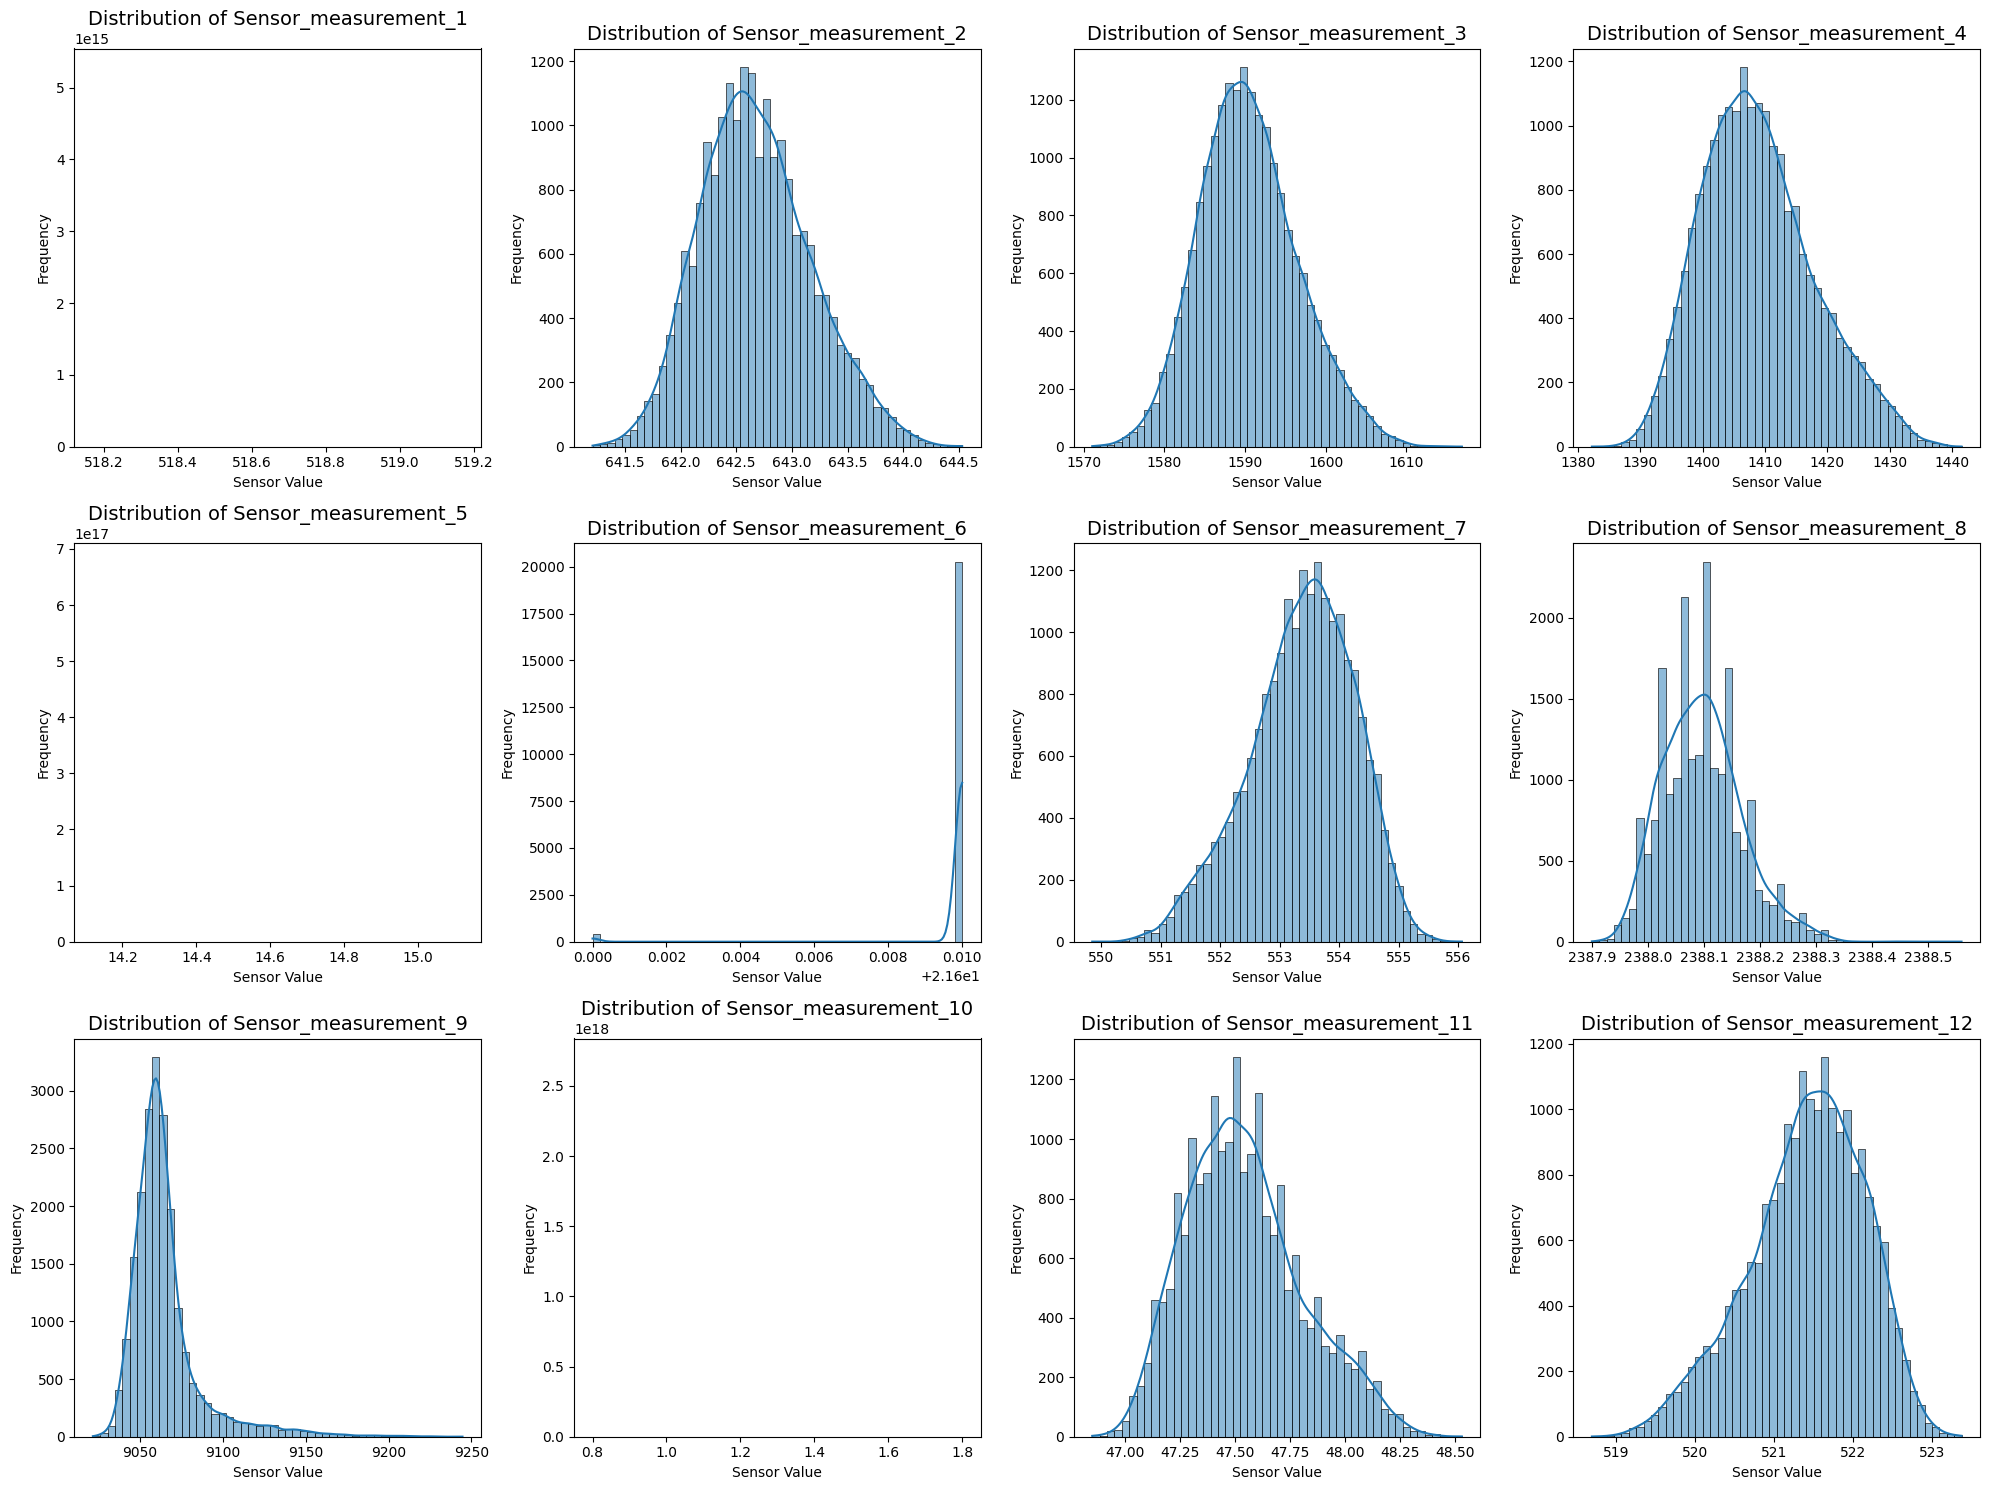

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting all sensors for plotting
sensors = ['Sensor_measurement_' + str(i) for i in range(1, 13)]  # Example: First 10 sensors

# Creatiing subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # Adjust rows and cols based on the number of sensors

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Ploting each sensor in its respective subplot
for i, sensor in enumerate(sensors):
    sns.histplot(df_train[sensor], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {sensor}', fontsize=14)
    axes[i].set_xlabel('Sensor Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Discussion on the graph:

1. Sensor 1, 5 and 10 have no distribution, reason is unkown
2. Other sensors, show a normal distribution, which says that there noisy data is not present (since its a simulated dataset)


###Visualizing the distribution of RUL

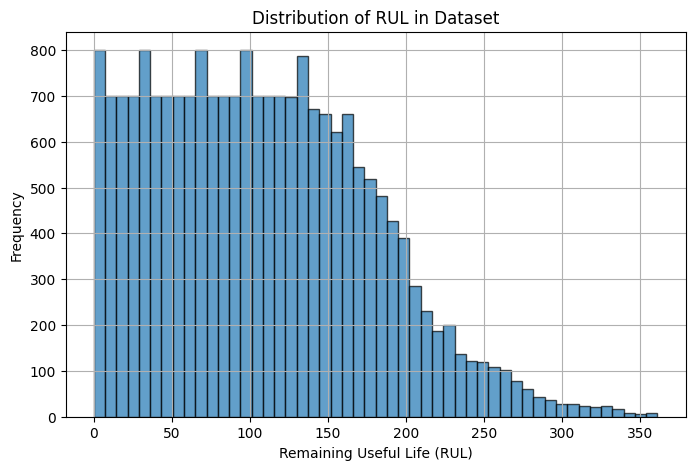

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df_train["RUL"], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("Remaining Useful Life (RUL)")
plt.ylabel("Frequency")
plt.title("Distribution of RUL in Dataset")
plt.grid(True)
plt.show()

**Discussion of the Graph:**

1. Right skewed - Less number of engines have greater life cycles, while operating in the same condition (sea-level)
Which indicates factors of influence that is unkown to us.
2. however, from 0 to around 128 RUL, there is a sudden spike every 20-30 RUL increments that go up to frequency of 800

###Table to Understand data across engines

Our aim is to understand each sensor's mean value across engines. By this we can estimate the working range of each sensor across engines and to detect any anamoly across different engines

In [ ]:
# Group by 'engine_id' and calculate the mean of each sensor for each engine
sensor_columns = ['Sensor_measurement_'+ str(i) for i in range(1, 22)]
sensor_data_across_engines = df_train.groupby('Unit_ID')[sensor_columns].mean().reset_index()
sensor_data_across_engines

,Unit_ID,Sensor_measurement_1,Sensor_measurement_2,Sensor_measurement_3,Sensor_measurement_4,Sensor_measurement_5,Sensor_measurement_6,Sensor_measurement_7,Sensor_measurement_8,Sensor_measurement_9,...,Sensor_measurement_12,Sensor_measurement_13,Sensor_measurement_14,Sensor_measurement_15,Sensor_measurement_16,Sensor_measurement_17,Sensor_measurement_18,Sensor_measurement_19,Sensor_measurement_20,Sensor_measurement_21
0,1,518.67,642.621042,1589.485521,1407.262135,14.62,21.610000,553.439427,2388.110260,9048.265833,...,521.459427,2388.110833,8128.913542,8.436555,0.03,392.854167,2388.0,100.0,38.840052,23.306310
1,2,518.67,642.435226,1588.181986,1404.265854,14.62,21.609338,553.853484,2388.057213,9062.652439,...,521.811603,2388.053554,8143.246167,8.423983,0.03,392.386760,2388.0,100.0,38.901150,23.338997
2,3,518.67,642.543743,1588.715084,1405.628994,14.62,21.609777,553.800056,2388.049777,9081.265866,...,521.773966,2388.047430,8159.557654,8.430236,0.03,392.754190,2388.0,100.0,38.882793,23.321931
3,4,518.67,642.662381,1590.563280,1408.253915,14.62,21.609947,553.443016,2388.079101,9077.366825,...,521.501005,2388.082275,8154.574444,8.439303,0.03,393.291005,2388.0,100.0,38.830265,23.294502
4,5,518.67,642.451970,1588.153271,1404.878439,14.62,21.609331,553.882342,2388.034201,9083.948253,...,521.866431,2388.029071,8161.807844,8.425968,0.03,392.646840,2388.0,100.0,38.891078,23.336284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,518.67,642.629821,1589.856190,1407.889970,14.62,21.609881,553.458065,2388.097887,9057.228423,...,521.454613,2388.100268,8136.360268,8.438163,0.03,393.110119,2388.0,100.0,38.826339,23.300243
96,97,518.67,642.522624,1589.431436,1405.888267,14.62,21.609901,553.725099,2388.059059,9076.269109,...,521.715891,2388.060941,8154.680149,8.429250,0.03,392.801980,2388.0,100.0,38.881337,23.326633
97,98,518.67,642.584872,1588.884167,1406.270962,14.62,21.609808,553.627756,2388.066218,9066.985064,...,521.656474,2388.070000,8145.904167,8.433159,0.03,392.724359,2388.0,100.0,38.860128,23.331571
98,99,518.67,642.611081,1589.501622,1407.740108,14.62,21.609892,553.505243,2388.098054,9056.732486,...,521.511730,2388.098973,8136.383622,8.435239,0.03,393.102703,2388.0,100.0,38.859135,23.305792


###Visualising sensor data across engines

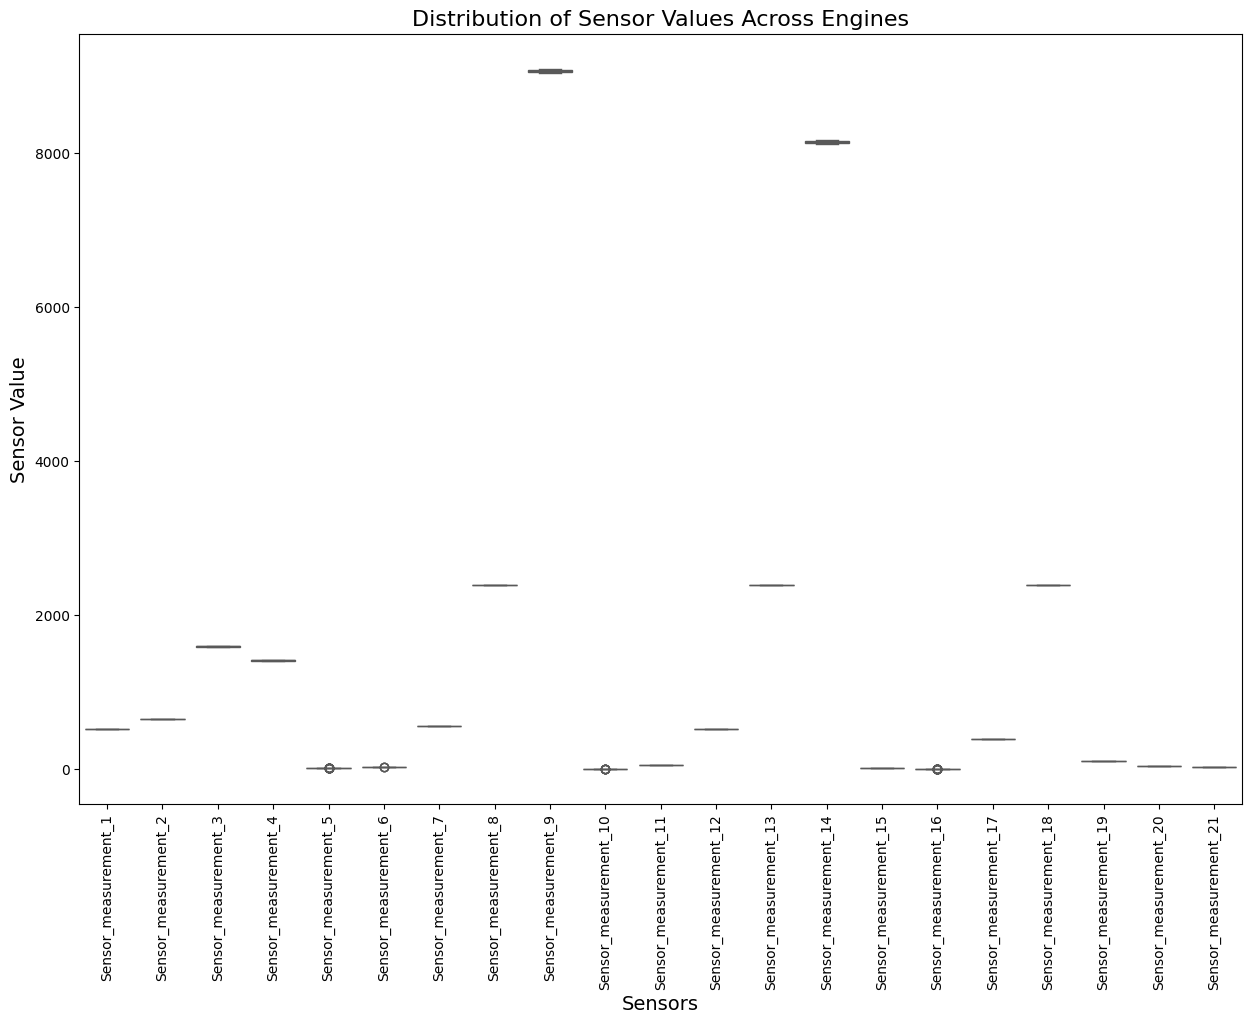

In [ ]:
plt.figure(figsize=(15, 10))

# Create box plots for each sensor (sensor_1 to sensor_21)
sns.boxplot(data=sensor_data_across_engines.iloc[:, 1:], palette="Set2")

plt.title('Distribution of Sensor Values Across Engines', fontsize=16)
plt.xlabel('Sensors', fontsize=14)
plt.ylabel('Sensor Value', fontsize=14)

plt.xticks(rotation=90)
plt.show()

The above plot image verifies that sensor reading across engines are consistent and not arbitrary values are recorded

###Corelation between sensors

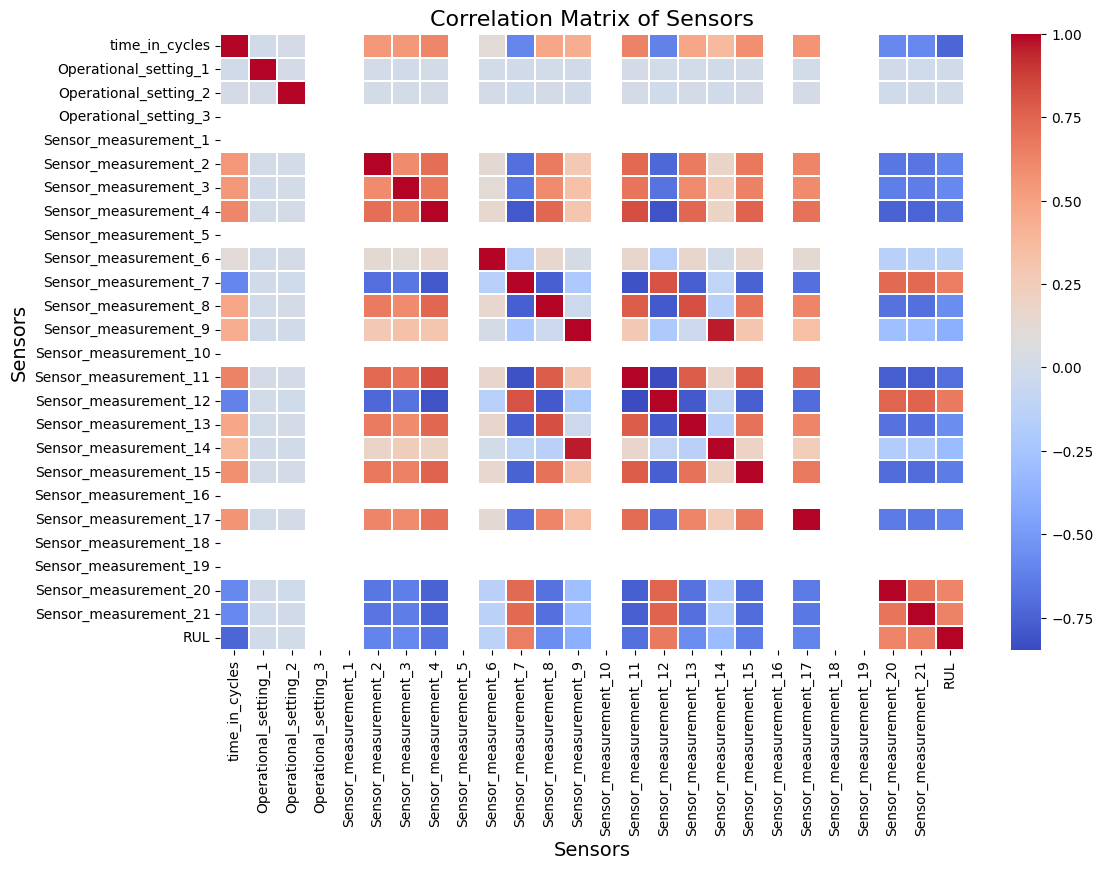

In [ ]:
correlation_matrix = df_train.iloc[:, 1:].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix of Sensors', fontsize=16)
plt.xlabel('Sensors', fontsize=14)
plt.ylabel('Sensors', fontsize=14)
plt.show()

###Discussion on the Co-relation Matrix
1. Sensor_measurement_11 and Sensor_measurement_17 have a relatively strong negative correlation with RUL (blue squares), which means as the sensor values increase, the RUL tends to decrease.

2. Sensor_measurement_2 shows a relatively strong positive correlation with Sensor_measurement_9,

3. Sensor_measurement_11 has some strong negative correlations with other sensors like Sensor_measurement_13 and Sensor_measurement_17

4. Sensor 2, Sensor 11, and Sensor 17 seem to play important roles since they have stronger correlations with RUL and several other sensors

### Visualizing sensor value trend throughout life cycle

To understand the trend of the values.

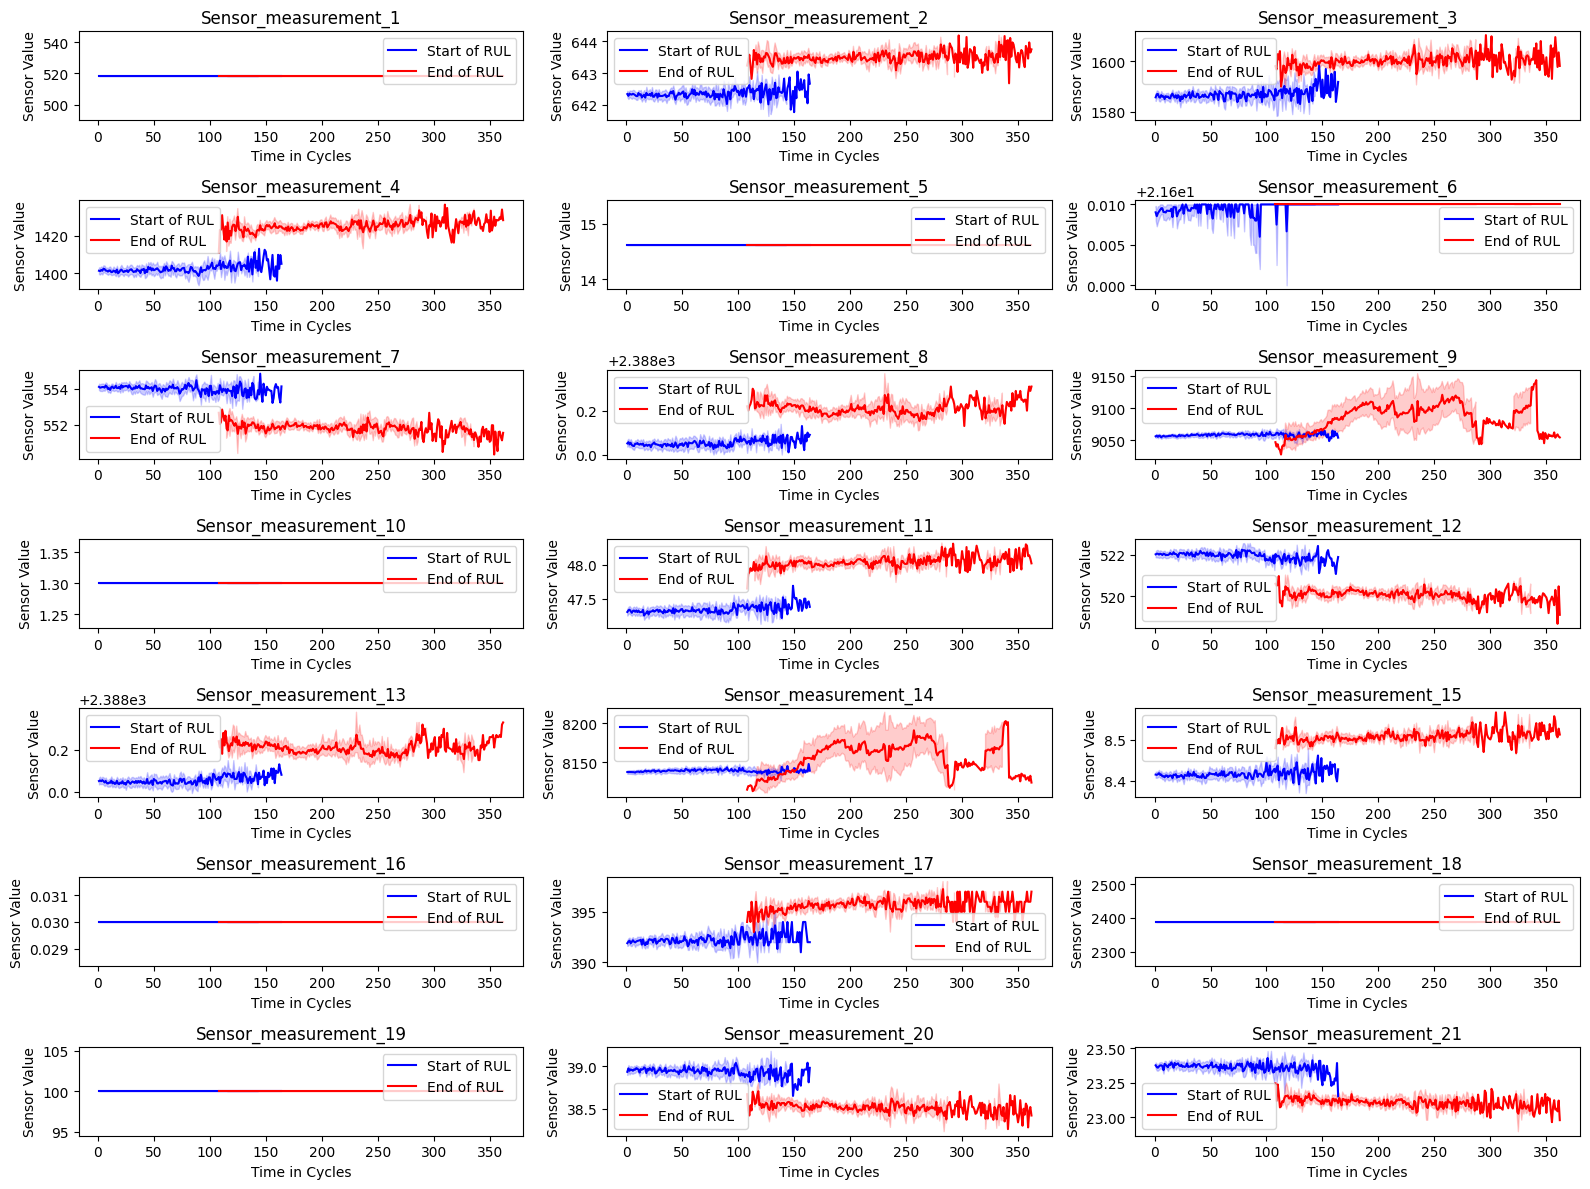

In [ ]:

# Define RUL thresholds for "Start" and "End"
start_threshold = df_train['RUL'].quantile(0.9)  # Top 10% of RUL (engines with high life remaining)
end_threshold = df_train['RUL'].quantile(0.1)    # Bottom 10% of RUL (engines close to failure)

start_rul_df = df_train[df_train['RUL'] >= start_threshold]
end_rul_df = df_train[df_train['RUL'] <= end_threshold]

plt.figure(figsize=(16, 12))
sensors = [col for col in df_train.columns if 'Sensor_measurement_' in col]

for i, sensor in enumerate(sensors, 1):
    plt.subplot(7, 3, i)

    # Plot line graphs for start of RUL
    sns.lineplot(data=start_rul_df, x='time_in_cycles', y=sensor, label='Start of RUL', color='blue')

    # Plot line graphs for end of RUL
    sns.lineplot(data=end_rul_df, x='time_in_cycles', y=sensor, label='End of RUL', color='red')

    plt.title(sensor)
    plt.xlabel('Time in Cycles')
    plt.ylabel('Sensor Value')

plt.tight_layout()
plt.show()


###Discussion on the Graph

Interpretation of Trends:
1. **Constant Sensors:**

  For some sensors like Sensor_1, Sensor_5, Sensor_10, and Sensor_18, the values remain constant throughout both the start and end of RUL. This indicates that these sensors do not show significant variation as the engine degrades, and hence may not be useful for predicting failure.

2. **Decreasing Trends (Health Deterioration)**:

  Sensors like Sensor_2, Sensor_3, Sensor_7, and Sensor_17 show a steady decline from the start of the RUL to the end. This suggests that these sensors are more responsive to engine wear and tear, and could be strong indicators of engine degradation over time.

3. **Increasing Trends:**

  Sensors such as Sensor_14 and Sensor_20 display an increasing trend towards the end of the RUL, meaning the sensor values rise as the engine approaches failure. These sensors are also potentially useful for tracking engine health.

4. **Fluctuating Sensors:**

  Some sensors show fluctuations, such as Sensor_9 and Sensor_13, which have varying values that differ significantly between the start and end of RUL. These could indicate non-linear degradation patterns or erratic behavior as the engine approaches failure.



###Conclusion on the graph:

- **Useful Sensors:** The sensors showing clear trends (either increasing or decreasing) over time could be key indicators of engine health and might be used to predict RUL effectively.
- **Non-useful Sensors:** Sensors that remain constant or show little variation, such as Sensor_1 and Sensor_18, may not provide significant information for predicting engine failure.

#Feature Engineering and Model Creation

In [8]:
df_train.head(10)

,Unit_ID,time_in_cycles,Operational_setting_1,Operational_setting_2,Operational_setting_3,Sensor_measurement_1,Sensor_measurement_2,Sensor_measurement_3,Sensor_measurement_4,Sensor_measurement_5,...,Sensor_measurement_13,Sensor_measurement_14,Sensor_measurement_15,Sensor_measurement_16,Sensor_measurement_17,Sensor_measurement_18,Sensor_measurement_19,Sensor_measurement_20,Sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,186
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774,185
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106,184
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066,183
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694,182


##Logic

We will make a baseline model first and check it's accuracy and then moving forward we will use differnt feature engineerin techniques like Sum, Ratios, Differnt, Time Window, to extract meaninful data and check Feature Importance, as it is a data driven modelling, we will have to iteratively find the best features.

###Baseline Model

In [9]:
# Original dataset: df_train
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df_train.drop(['RUL'], axis = 1)
y = df_train['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(" Training Data X :",X_train.shape)
print(" Training Data y :",y_train.shape)
print(" Testing Data X :",X_test.shape)
print(" Testing Data y :",y_test.shape)



 Training Data X : (16504, 26)
 Training Data y : (16504,)
 Testing Data X : (4127, 26)
 Testing Data y : (4127,)


In [10]:
#Baseline Model Features used
print('Features_used:', X.columns)

Features_used: Index(['Unit_ID', 'time_in_cycles', 'Operational_setting_1',
       'Operational_setting_2', 'Operational_setting_3',
       'Sensor_measurement_1', 'Sensor_measurement_2', 'Sensor_measurement_3',
       'Sensor_measurement_4', 'Sensor_measurement_5', 'Sensor_measurement_6',
       'Sensor_measurement_7', 'Sensor_measurement_8', 'Sensor_measurement_9',
       'Sensor_measurement_10', 'Sensor_measurement_11',
       'Sensor_measurement_12', 'Sensor_measurement_13',
       'Sensor_measurement_14', 'Sensor_measurement_15',
       'Sensor_measurement_16', 'Sensor_measurement_17',
       'Sensor_measurement_18', 'Sensor_measurement_19',
       'Sensor_measurement_20', 'Sensor_measurement_21'],
      dtype='object')


In [11]:
baseline_model = RandomForestRegressor(random_state=42)
baseline_model.fit(X_train, y_train)
# Evaluate baseline model
baseline_preds = baseline_model.predict(X_test)
baseline_rmse = mean_squared_error(y_test, baseline_preds)
print(f"Baseline RMSE: {baseline_rmse}")

Baseline RMSE: 259.4696690816574


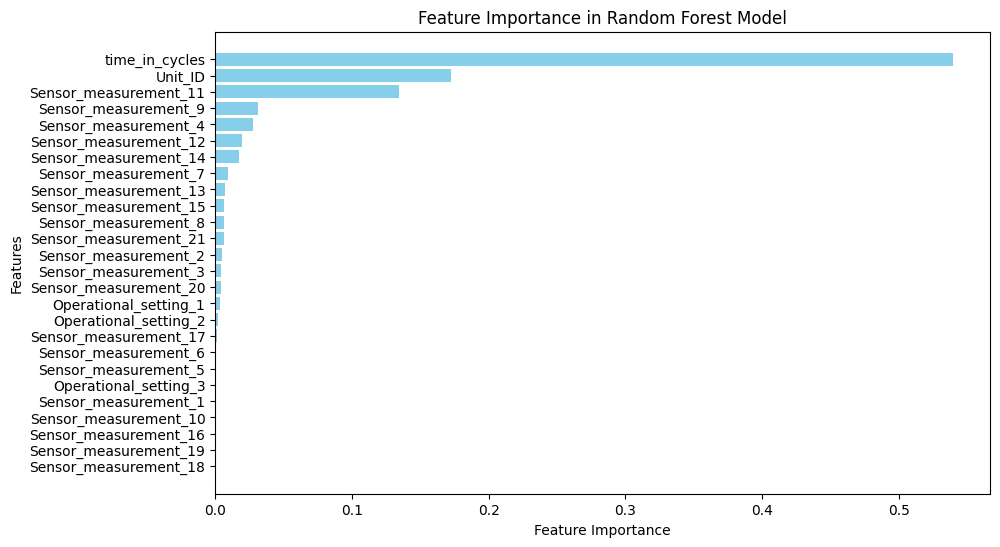

In [17]:
#To check the feature importace for the mode
import matplotlib.pyplot as plt
import seaborn as sns
#Extracting feature imporatance data from the model and making  a new dataframe for visualizaion

feature_importance = baseline_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#Visualizing the feature importance matrix

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.show()


###Iteration 1:

From EDA and correatlion analysis, we have found 13 sensros which show correlation with RUL, which are:
1. Time_in_cycles
2. Senosor_Measurment_2
2. Senosor_Measurment_3
2. Senosor_Measurment_4
2. Senosor_Measurment_7
2. Senosor_Measurment_8
2. Senosor_Measurment_11
2. Senosor_Measurment_12
2. Senosor_Measurment_13
2. Senosor_Measurment_15
2. Senosor_Measurment_17
2. Senosor_Measurment_20
2. Senosor_Measurment_21


In [21]:
X = df_train.drop(['Unit_ID',  'Operational_setting_1',
       'Operational_setting_2', 'Operational_setting_3',
       'Sensor_measurement_1', 'Sensor_measurement_5', 'Sensor_measurement_6',
       'Sensor_measurement_9','Sensor_measurement_10','Sensor_measurement_14','Sensor_measurement_16',
       'Sensor_measurement_18', 'Sensor_measurement_19', 'RUL'], axis = 1)
y= df_train['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(" Training Data X :",X_train.shape)
print(" Training Data y :",y_train.shape)
print(" Testing Data X :",X_test.shape)
print(" Testing Data y :",y_test.shape)


 Training Data X : (16504, 13)
 Training Data y : (16504,)
 Testing Data X : (4127, 13)
 Testing Data y : (4127,)


In [22]:
#Features used
print('Features_used:', X.columns)

Features_used: Index(['time_in_cycles', 'Sensor_measurement_2', 'Sensor_measurement_3',
       'Sensor_measurement_4', 'Sensor_measurement_7', 'Sensor_measurement_8',
       'Sensor_measurement_11', 'Sensor_measurement_12',
       'Sensor_measurement_13', 'Sensor_measurement_15',
       'Sensor_measurement_17', 'Sensor_measurement_20',
       'Sensor_measurement_21'],
      dtype='object')


In [23]:
model_1 = RandomForestRegressor(random_state=42)
model_1.fit(X_train, y_train)
# Evaluate model
model_1_preds = model_1.predict(X_test)
model_1_rmse = mean_squared_error(y_test, model_1_preds)
print(f"Model 1 RMSE: {model_1_rmse}")


Model 1 RMSE: 1395.743231330264


In [26]:
print(f"Baseline RMSE: {baseline_rmse}")
print(f"Model 1 RMSE: {model_1_rmse}")
print("Difference:" , model_1_rmse - baseline_rmse)

Baseline RMSE: 259.4696690816574
Model 1 RMSE: 1395.743231330264
Difference: 1136.2735622486066


###Conclusion on Iteration 1:

Model performs worst than the Baseline model

### Iteration 2:


In [ ]:
# Trying iteration 1 after scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df_train.drop(['Unit_ID',  'Operational_setting_1',
       'Operational_setting_2', 'Operational_setting_3',
       'Sensor_measurement_1', 'Sensor_measurement_5', 'Sensor_measurement_6',
       'Sensor_measurement_9','Sensor_measurement_10','Sensor_measurement_14','Sensor_measurement_16',
       'Sensor_measurement_18', 'Sensor_measurement_19', 'RUL'], axis = 1)
y= df_train['RUL']
X_scaled = scaler.fit_transform(X_train)


In [29]:
model_2 = RandomForestRegressor(random_state=42)
model_2.fit(X_train, y_train)
# Evaluate model
model_2_preds = model_2.predict(X_test)
model_2_rmse = mean_squared_error(y_test, model_2_preds)
print(f"Baseline RMSE: {baseline_rmse}")
print(f"Model 1 RMSE: {model_1_rmse}")
print(f"Model 2 RMSE: {model_2_rmse}")

Baseline RMSE: 259.4696690816574
Model 1 RMSE: 1395.743231330264
Model 2 RMSE: 1395.743231330264


###Conclusion of Iteration 2:

There was not effect of scaling the variables

### Iteration 3:
We will make interaction in this iteration, using the corelation matrix we know the variables that are highly corelated to RUL, we will select them and manually try to create interaction terms and then test our model

Using postive highly corelated variable first:
1. Sensor 7
2. Senosr 12
3. Sensor 20
4. Sensor 21


In [12]:
select_sensors= ['Sensor_measurement_7', 'Sensor_measurement_12', 'Sensor_measurement_20', 'Sensor_measurement_21']
X = df_train[select_sensors]
y = df_train['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(" Training Data X :",X_train.shape)
print(" Training Data y :",y_train.shape)
print(" Testing Data X :",X_test.shape)
print(" Testing Data y :",y_test.shape)


 Training Data X : (16504, 4)
 Training Data y : (16504,)
 Testing Data X : (4127, 4)
 Testing Data y : (4127,)


In [31]:
# creating model without any interactions first to see if RMSE is good or bad
model_3 = RandomForestRegressor(random_state=4)
model_3.fit(X_train, y_train)
# Evaluate model
model_3_preds = model_3.predict(X_test)
model_3_rmse = mean_squared_error(y_test, model_3_preds)
print(f"Baseline RMSE: {baseline_rmse}")
print(f"Model 1 RMSE: {model_1_rmse}")
print(f"Model 2 RMSE: {model_2_rmse}")
print(f"Model 3 RMSE: {model_3_rmse}")


Baseline RMSE: 259.4696690816574
Model 1 RMSE: 1395.743231330264
Model 2 RMSE: 1395.743231330264
Model 3 RMSE: 2425.586694039254


###Conlusion on Iteration 3
Model perfroms worst than before

Generating pairwise interaction terms between the above selected sensors

In [19]:
X_interactions = X.copy()
for i in range(len(select_sensors)):
    for j in range(i+1, len(select_sensors)):
        sensor_1 = select_sensors[i]
        sensor_2 = select_sensors[j]
        interaction_name = f"{'sensor_'+str(i)}_{'sensor_'+str(j)}"
        X_interactions[interaction_name] = X[sensor_1] * X[sensor_2]
X_interactions

,Sensor_measurement_7,Sensor_measurement_12,Sensor_measurement_20,Sensor_measurement_21,sensor_0_sensor_1,sensor_0_sensor_2,sensor_0_sensor_3,sensor_1_sensor_2,sensor_1_sensor_3,sensor_2_sensor_3
0,554.36,521.66,39.06,23.4190,289187.4376,21653.3016,12982.556840,20376.0396,12216.755540,914.746140
1,553.75,522.28,39.00,23.4236,289212.5500,21596.2500,12970.818500,20368.9200,12233.677808,913.520400
2,554.26,522.42,38.95,23.3442,289556.5092,21588.4270,12938.756292,20348.2590,12195.476964,909.256590
3,554.45,522.86,38.88,23.3739,289899.7270,21557.0160,12959.658855,20328.7968,12221.277354,908.777232
4,554.00,522.19,38.90,23.4044,289293.2600,21550.6000,12966.037600,20313.1910,12221.543636,910.431160
...,...,...,...,...,...,...,...,...,...,...
20626,551.43,519.49,38.49,22.9735,286462.3707,21224.5407,12668.277105,19995.1701,11934.503515,884.250015
20627,550.86,519.68,38.30,23.1594,286270.9248,21097.9380,12757.587084,19903.7440,12035.476992,887.005020
20628,550.94,520.01,38.44,22.9333,286494.3094,21178.1336,12634.872302,19989.1844,11925.545333,881.556052
20629,550.68,519.67,38.29,23.0640,286171.8756,21085.5372,12700.883520,19898.1643,11985.668880,883.120560


In [20]:
#Training model with interaction terms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X_interactions, y, test_size = 0.2, random_state = 42)
print(" Training Data X :",X_train.shape)
print(" Training Data y :",y_train.shape)
print(" Testing Data X :",X_test.shape)
print(" Testing Data y :",y_test.shape)

 Training Data X : (16504, 10)
 Training Data y : (16504,)
 Testing Data X : (4127, 10)
 Testing Data y : (4127,)


In [21]:
features_used = X_interactions.columns
print('Features_used:', features_used)

Features_used: Index(['Sensor_measurement_7', 'Sensor_measurement_12',
       'Sensor_measurement_20', 'Sensor_measurement_21', 'sensor_0_sensor_1',
       'sensor_0_sensor_2', 'sensor_0_sensor_3', 'sensor_1_sensor_2',
       'sensor_1_sensor_3', 'sensor_2_sensor_3'],
      dtype='object')


In [31]:
Model_1_RMSE= 1395.743231330264
Model_2_RMSE= 1395.743231330264
Model_3_RMSE= 2425.586694039254

###Iteration 4

In [23]:
#Training model
model_4 = RandomForestRegressor(random_state=4)
model_4.fit(X_train, y_train)
# Evaluate model
model_4_preds = model_4.predict(X_test)
model_4_rmse = mean_squared_error(y_test, model_4_preds)
print(f"Baseline RMSE: {baseline_rmse}")
print(f"Model 1 RMSE: 1395.743231330264")
print(f"Model 2 RMSE: 1395.743231330264")
print(f"Model 3 RMSE: 2425.586694039254")
print(f"Model 4 RMSE: {model_4_rmse}")


Baseline RMSE: 259.4696690816574
Model 1 RMSE: 1395.743231330264
Model 2 RMSE: 1395.743231330264
Model 3 RMSE: 2425.586694039254
Model 4 RMSE: 2431.777313738793


### Iteration 5
Using interaction terms and also the sensors which are negatively corelated to RUL, which were previously dropped

Features added:

1. Time_in_cylces
2. Sensor_Measurement_2
2. Sensor_Measurement_3
2. Sensor_Measurement_4
2. Sensor_Measurement_8
2. Sensor_Measurement_11
2. Sensor_Measurement_13
2. Sensor_Measurement_15
2. Sensor_Measurement_17

In [27]:
select_sensors= ['Sensor_measurement_7', 'Sensor_measurement_12', 'Sensor_measurement_20', 'Sensor_measurement_21']
negative_corelated_variables = ['time_in_cycles', 'Sensor_measurement_2', 'Sensor_measurement_3', 'Sensor_measurement_4', 'Sensor_measurement_8', 'Sensor_measurement_11', 'Sensor_measurement_13', 'Sensor_measurement_15', 'Sensor_measurement_17']
X = df_train[select_sensors]
y = df_train['RUL']
X_interactions = X.copy()
for i in range(len(select_sensors)):
    for j in range(i+1, len(select_sensors)):
        sensor_1 = select_sensors[i]
        sensor_2 = select_sensors[j]
        interaction_name = f"{'sensor_'+str(i)}_{'sensor_'+str(j)}"
        X_interactions[interaction_name] = X[sensor_1] * X[sensor_2]
X = X_interactions + df_train[negative_corelated_variables]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(" Training Data X :",X_train.shape)
print(" Training Data y :",y_train.shape)
print(" Testing Data X :",X_test.shape)
print(" Testing Data y :",y_test.shape)


 Training Data X : (16504, 19)
 Training Data y : (16504,)
 Testing Data X : (4127, 19)
 Testing Data y : (4127,)


In [30]:
features_used = X.columns
print('Features_used:', features_used)

Features_used: Index(['Sensor_measurement_11', 'Sensor_measurement_12',
       'Sensor_measurement_13', 'Sensor_measurement_15',
       'Sensor_measurement_17', 'Sensor_measurement_2',
       'Sensor_measurement_20', 'Sensor_measurement_21',
       'Sensor_measurement_3', 'Sensor_measurement_4', 'Sensor_measurement_7',
       'Sensor_measurement_8', 'sensor_0_sensor_1', 'sensor_0_sensor_2',
       'sensor_0_sensor_3', 'sensor_1_sensor_2', 'sensor_1_sensor_3',
       'sensor_2_sensor_3', 'time_in_cycles'],
      dtype='object')


In [32]:
#Training model
model_5 = RandomForestRegressor(random_state=4)
model_5.fit(X_train, y_train)
# Evaluate model
model_5_preds = model_5.predict(X_test)
model_5_rmse = mean_squared_error(y_test, model_5_preds)
print(f"Baseline RMSE: {baseline_rmse}")
print(f"Model 1 RMSE: {Model_1_RMSE}")
print(f"Model 2 RMSE: {Model_2_RMSE}")
print(f"Model 3 RMSE: {Model_3_RMSE}")
print(f"Model 4 RMSE: {model_4_rmse}")
print(f"Model 5 RMSE: {model_5_rmse}")


Baseline RMSE: 259.4696690816574
Model 1 RMSE: 1395.743231330264
Model 2 RMSE: 1395.743231330264
Model 3 RMSE: 2425.586694039254
Model 4 RMSE: 2431.777313738793
Model 5 RMSE: 4570.413421700405


###Iteration 6

Using L1 Regularization method to train a lasso model which automatically penalizes the co efficient that do not contribute to the prediction

Lasso (alpha = 0.01)

In [36]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
import numpy as np

X = df_train.drop(['Unit_ID', 'RUL'], axis = 1)
y = df_train['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(" Training Data X :",X_train.shape)
print(" Training Data y :",y_train.shape)
print(" Testing Data X :",X_test.shape)
print(" Testing Data y :",y_test.shape)


 Training Data X : (16504, 25)
 Training Data y : (16504,)
 Testing Data X : (4127, 25)
 Testing Data y : (4127,)


In [37]:
# Apply Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[model.get_support()]
print("Selected features by Lasso: ", selected_features)

Selected features by Lasso:  Index(['time_in_cycles', 'Sensor_measurement_2', 'Sensor_measurement_3',
       'Sensor_measurement_4', 'Sensor_measurement_7', 'Sensor_measurement_8',
       'Sensor_measurement_9', 'Sensor_measurement_11',
       'Sensor_measurement_12', 'Sensor_measurement_13',
       'Sensor_measurement_14', 'Sensor_measurement_15',
       'Sensor_measurement_17', 'Sensor_measurement_20',
       'Sensor_measurement_21'],
      dtype='object')


Our above output prooves our initial hunch that the selected sensors used before for previous models were indeed important to the target variable RUL

In [41]:
# Train the Lasso model again on the selected features
lasso_selected = Lasso(alpha=0.01)
lasso_selected.fit(X_train_selected, y_train)

# Make predictions on test set
y_pred = lasso_selected.predict(X_test_selected)

# Calculate RMSE
model_6_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Lasso-selected features RMSE: {model_6_rmse}")

Lasso-selected features RMSE: 39.724501861109445


In [42]:
print("BaseLine Model Accuracy (Random Forest):", baseline_rmse)
print("Model 1 Accuracy (Random Forest): ", Model_1_RMSE)
print("Model 2 Accuracy (Random Forest): ", Model_2_RMSE)
print("Model 3 Accuracy (Random Forest): ", Model_3_RMSE)
print("Model 4 Accuracy (Random Forest): ", model_4_rmse)
print("Model 5 Accuracy (Random Forest):", model_5_rmse)
print("Model 6 Lasso-selected features RMSE:", rmse)

BaseLine Model Accuracy (Random Forest): 259.4696690816574
Model 1 Accuracy (Random Forest):  1395.743231330264
Model 2 Accuracy (Random Forest):  1395.743231330264
Model 3 Accuracy (Random Forest):  2425.586694039254
Model 4 Accuracy (Random Forest):  2431.777313738793
Model 5 Accuracy (Random Forest): 4570.413421700405
Model 6 Lasso-selected features RMSE: 39.724501861109445


####Grid CV Search for best alpha

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

Best alpha: 0.001


###Iteration 7

Lasso Regression (alpha = 0.001)

In [46]:
X = df_train[['time_in_cycles', 'Sensor_measurement_2', 'Sensor_measurement_3',
       'Sensor_measurement_4', 'Sensor_measurement_7', 'Sensor_measurement_8',
       'Sensor_measurement_9', 'Sensor_measurement_11',
       'Sensor_measurement_12', 'Sensor_measurement_13',
       'Sensor_measurement_14', 'Sensor_measurement_15',
       'Sensor_measurement_17', 'Sensor_measurement_20',
       'Sensor_measurement_21']]
y = df_train['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(" Training Data X :",X_train.shape)
print(" Training Data y :",y_train.shape)
print(" Testing Data X :",X_test.shape)
print(" Testing Data y :",y_test.shape)


 Training Data X : (16504, 15)
 Training Data y : (16504,)
 Testing Data X : (4127, 15)
 Testing Data y : (4127,)


In [47]:
lasso_best = Lasso(alpha=0.001)
lasso_best.fit(X_train, y_train)
y_pred = lasso_best.predict(X_test)
model_6_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE with best alpha (0.001): {model_6_rmse}")

RMSE with best alpha (0.001): 39.70489591657862


In [49]:
best_features = ['time_in_cycles', 'Sensor_measurement_2', 'Sensor_measurement_3',
       'Sensor_measurement_4', 'Sensor_measurement_7', 'Sensor_measurement_8',
       'Sensor_measurement_9', 'Sensor_measurement_11',
       'Sensor_measurement_12', 'Sensor_measurement_13',
       'Sensor_measurement_14', 'Sensor_measurement_15',
       'Sensor_measurement_17', 'Sensor_measurement_20',
       'Sensor_measurement_21']
print("Selected features by Lasso: ", best_features)

Selected features by Lasso:  ['time_in_cycles', 'Sensor_measurement_2', 'Sensor_measurement_3', 'Sensor_measurement_4', 'Sensor_measurement_7', 'Sensor_measurement_8', 'Sensor_measurement_9', 'Sensor_measurement_11', 'Sensor_measurement_12', 'Sensor_measurement_13', 'Sensor_measurement_14', 'Sensor_measurement_15', 'Sensor_measurement_17', 'Sensor_measurement_20', 'Sensor_measurement_21']


In [52]:
from sklearn.model_selection import GridSearchCV

X = df_train[best_features]
y = df_train['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

param_grid = {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.1],
    'max_iter': [1000, 5000, 10000],  # Add more iterations for convergence
    'tol': [1e-4, 1e-3, 1e-2]  # Adjust tolerance level
}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

model_7 = grid_search.best_estimator_
y_pred = model_7.predict(X_test)
model_7_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE with best parameters: {model_7_rmse}")

Best Parameters: {'alpha': 0.001, 'max_iter': 1000, 'tol': 0.0001}
RMSE with best parameters: 39.70489591657862


##Conclusion
Using Lasso L1 regularization method, we found the best features which were:
1. Time in Cycles
2. Sensor Measurment 2
3. Sensor Measurment 3
4. Sensor Measurment 4
5. Sensor Measurment 7
6. Sensor Measurment 8
7. Sensor Measurment 9
8. Sensor Measurment 11
9. Sensor Measurment 12
10. Sensor Measurment 13
11. Sensor Measurment 14
12. Sensor Measurment 15
13. Sensor Measurment 17
14. Sensor Measurment 20
15. Sensor Measurment 21

and, then went on to train the model using 3 hyperparameter tuning techniques

1. alpha
2. Max iterations
3. Tolerance level

Our, **Best Score** : 39.70

## Alternative Model

Using Gradient Boosting method as an alternatice model:

Why?

Because,
Gradient Boosting algorithms are powerful for regression tasks and often outperform simpler models. XGBoost uses decision trees as its base learners combining them sequentially to improve the model’s performance. Each new tree is trained to correct the errors made by the previous tree and this process is called **boosting.**

One commonly used gradient boosting algorithm is **XGBoost.**


In [54]:
!pip install xgboost


In [57]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df_train.drop(['Unit_ID', 'RUL'], axis = 1)
y = df_train['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(" Training Data X :",X_train.shape)
print(" Training Data y :",y_train.shape)
print(" Testing Data X :",X_test.shape)
print(" Testing Data y :",y_test.shape)

 Training Data X : (16504, 25)
 Training Data y : (16504,)
 Testing Data X : (4127, 25)
 Testing Data y : (4127,)


In [59]:
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train, y_train)

y_pred = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost RMSE: {rmse}")


XGBoost RMSE: 43.66353760979019


In [62]:
XGBoost_RMSE= 43.66353760979019

###Hyper Parameter Tuning


In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01, 0.05, 0.1],
              'max_depth':[5,8, 10],
              'n_estimators': [50,100, 200],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.3, 0.7, 1.0] }
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


Using GridSearch we found out our best parameter tunings

1. Colsample_bytree = 0.3
2. Learning rate = 0.05
3. Max depth = 5
4. N estimators = 200
5. Subsamples = 1

In [61]:
best_xgb = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 5, n_estimators = 200, subsample = 1)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE with best parameters: {rmse}")


RMSE with best parameters: 35.454285321470664


In [63]:
print(f"RMSE with best parameters: {rmse}")
print(f"RMSE without best parameters: {XGBoost_RMSE}")

RMSE with best parameters: 35.454285321470664
RMSE without best parameters: 43.66353760979019


## Alternative Model Conclusion

Our alternative Model, XGBoost outperformed Lasso Regression Model

After Hyperparameter Tuning, we found the best parameters through GridSearchCV method

Our **Best Score** : 35.45

## Model Evaluation

We used 8 different models to predict the Target Variable
1. Baseline Model - RandomForst
2. Model 1 - Random Forest - with selected features
3. Model 2 - Random Forrest - with scaling feattures
4. Model 3 - Random Forest - Making interaction terms between positive co related features
5. Model 4 -Random Forest - Interation terms and negative co related features
6. Model 5 - L1 Regularization

  alpha = 0.01

  alpha = 0.001
7. Model 6 - Grid SearchCV best parameters
8. Model 7 - XGBoost
9. Model 8 - XGBoost with gridSearchCV best parameters


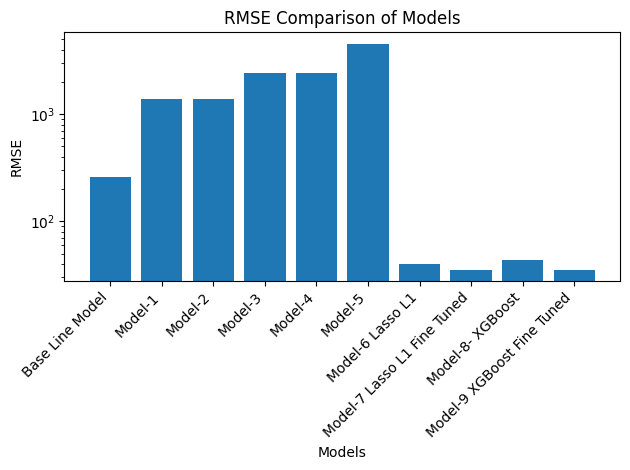

In [4]:
import matplotlib.pyplot as plt

models = ['Base Line Model', 'Model-1', 'Model-2', 'Model-3', 'Model-4', 'Model-5', 'Model-6 Lasso L1', 'Model-7 Lasso L1 Fine Tuned', 'Model-8- XGBoost', 'Model-9 XGBoost Fine Tuned']
rmse_values = [259.46, 1395.74, 1395.74, 2425.58, 2431.77, 4570.41, 39.70, 35.45, 43.66, 35.45]

plt.bar(models, rmse_values)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Models')
plt.yscale('log')  # Apply a logarithmic scale to the y-axis
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()